<a href="https://colab.research.google.com/github/Isaacguto02/Inteligencia-Artificial-Ago-Dic/blob/main/Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


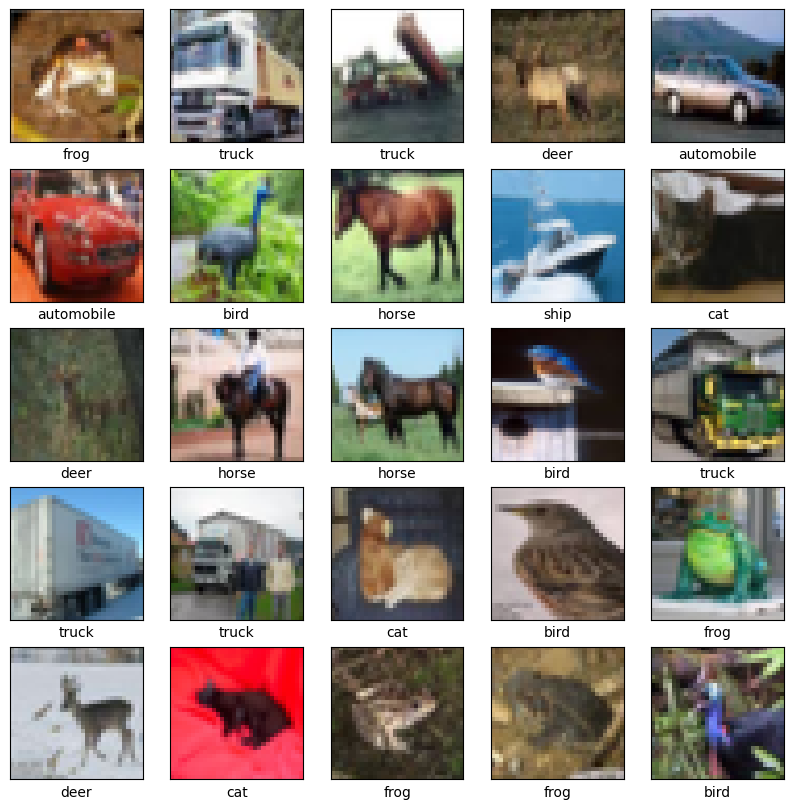

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5897 - accuracy: 0.4161 - val_loss: 1.3634 - val_accuracy: 0.5093
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2140 - accuracy: 0.5667 - val_loss: 1.1403 - val_accuracy: 0.5882
Epoch 3/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0699 - accuracy: 0.6214 - val_loss: 1.0414 - val_accuracy: 0.6257
Epoch 4/10
1563/1563 [==============================] - 87s 55ms/step - loss: 0.9784 - accuracy: 0.6564 - val_loss: 0.9661 - val_accuracy: 0.6587
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.9056 - accuracy: 0.6821 - val_loss: 0.9367 - val_accuracy: 0.6733
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8494 - accuracy: 0.7017 - val_loss: 0.9269 - val_accuracy: 0.6770
Epoch 7/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7993 - accuracy: 0.7204 - val_loss: 0.8982 -

In [27]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Hacer predicciones
predictions = model.predict(test_images)

313/313 - 4s - loss: 0.8794 - accuracy: 0.7047 - 4s/epoch - 14ms/step

Test accuracy: 0.7046999931335449
313/313 [==============================] - 5s 14ms/step


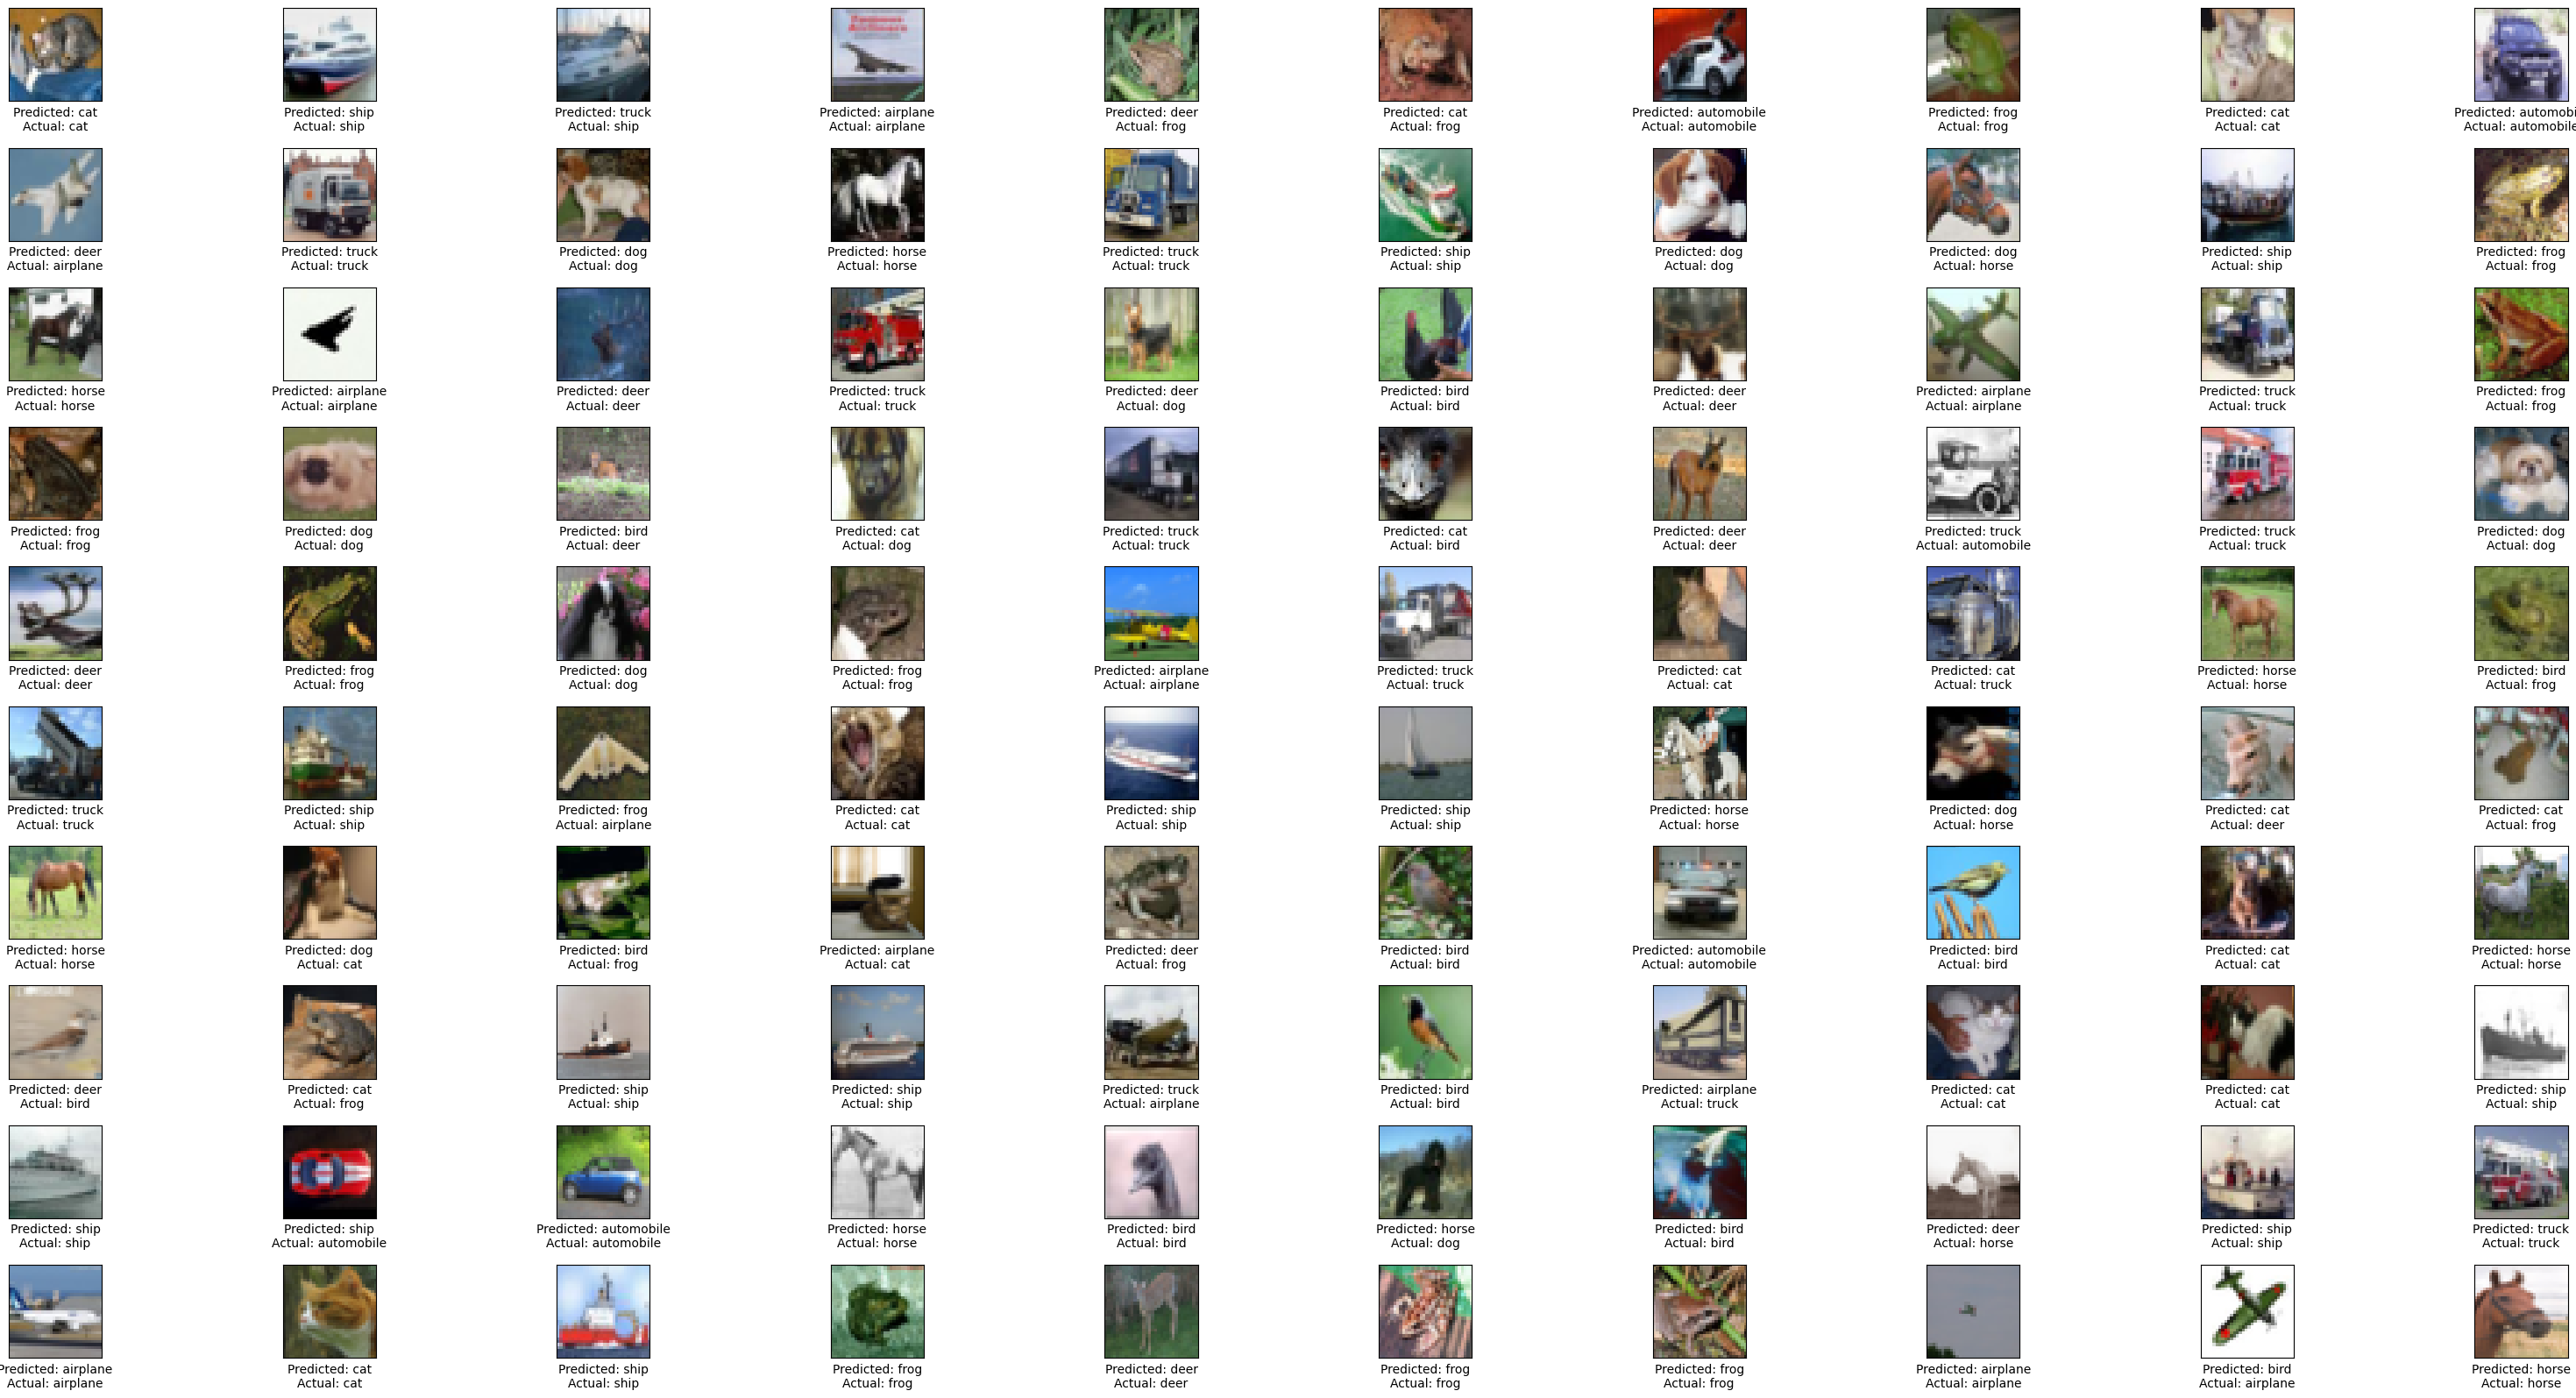

In [34]:
from matplotlib import numpy
import numpy as np
# Visualización de algunas predicciones
num_rows = 10
num_cols = 10
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
plt.subplots_adjust(hspace=0.5)  # Ajuste del espacio vertical entre filas
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    # Asegúrate de que las etiquetas sean enteros
    predicted_label = class_names[np.argmax(predictions[i])]
    actual_label = class_names[int(test_labels[i])]  # Convertir a entero

    plt.xlabel("Predicted: {}\nActual: {}".format(predicted_label, actual_label))

313/313 - 5s - loss: 0.8794 - accuracy: 0.7047 - 5s/epoch - 17ms/step


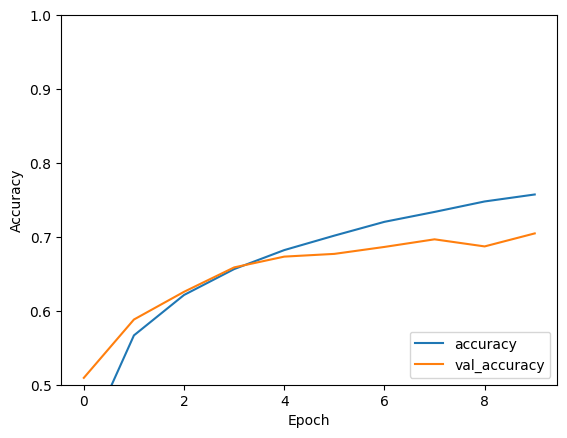

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)